
# Classification

## Demo 2 : Decision Tree in Python

In this demo, you will learn how to apply decision tree algorithm in Python using scikit-learn library.

---

## Problem Statement

The dataset contains information about 3 brands namely US,Japan, Europe. Other parameters are mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year. The task is to find the brand of a car using these parameters.

---

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

## Dataset

In [2]:
#Reading the dataset using pandas
car_data=pd.read_csv('cars.csv')
car_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


## Data Analysis

In [3]:
#Dataset shape to get row and column count
car_data.shape

(261, 8)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Null Values</h3></li></ul>
</div>

In [4]:
#Checking for any null values
car_data.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        None of the columns contain null values so there is no need to remove/replace data
    </span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encoding Target Variable</h3></li></ul>
</div>

In [6]:
#Using labelencoder to encode the target variable
lb=LabelEncoder()
car_data['brand']=lb.fit_transform(car_data['brand'])
print(car_data)

      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year  brand
0    14.0          8          350  165       4209          12  1972      2
1    31.9          4           89   71       1925          14  1980      0
2    17.0          8          302  140       3449          11  1971      2
3    15.0          8          400  150       3761          10  1971      2
4    30.5          4           98   63       2051          17  1978      2
..    ...        ...          ...  ...        ...         ...   ...    ...
256  17.0          8          305  130       3840          15  1980      2
257  36.1          4           91   60       1800          16  1979      1
258  22.0          6          232  112       2835          15  1983      2
259  18.0          6          232  100       3288          16  1972      2
260  22.0          6          250  105       3353          15  1977      2

[261 rows x 8 columns]


<div style="background-color:##EDF9FF">
  <ul><li><h3>Divide Feature And Target Varaibles</h3></li></ul>
</div>

In [7]:
#Divide the dataset into independent and dependent variables
X=car_data.drop('brand',axis=1)
y=car_data['brand']

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Set</h3></li></ul>
</div>

In [8]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #20 percent of data will be used for testing purpose

## Decision Tree Training

The following parameters should be considered during training a decision tree:
- __criterion__: To measure quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- __spliter__: Either 'best' to choose best split or 'random' to choose random best split. By default takes 'best' value.
- __max_features__: Number of features to consider.
- __max_depth__: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


The classifier has several parameter which are used depending on the requirement. For more information about thsese parameters you can visit:<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>Decision Tree</a>

In [25]:
dt_car=DecisionTreeClassifier(criterion='gini',splitter='best',max_features=6,max_depth=3)
dt_car.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=6)

## Visualizing Decision Tree

In [26]:
#Saving the dot file as it requires additional dependencies
#This file can be converted into png or jpg using any online converters
graph_data=open('graph.dot','w')
export_graphviz(dt_car,out_file=graph_data,filled=True,special_characters=True,
                feature_names=list(X_train.columns),class_names=list(lb.classes_),rounded=True)
graph_data.close()

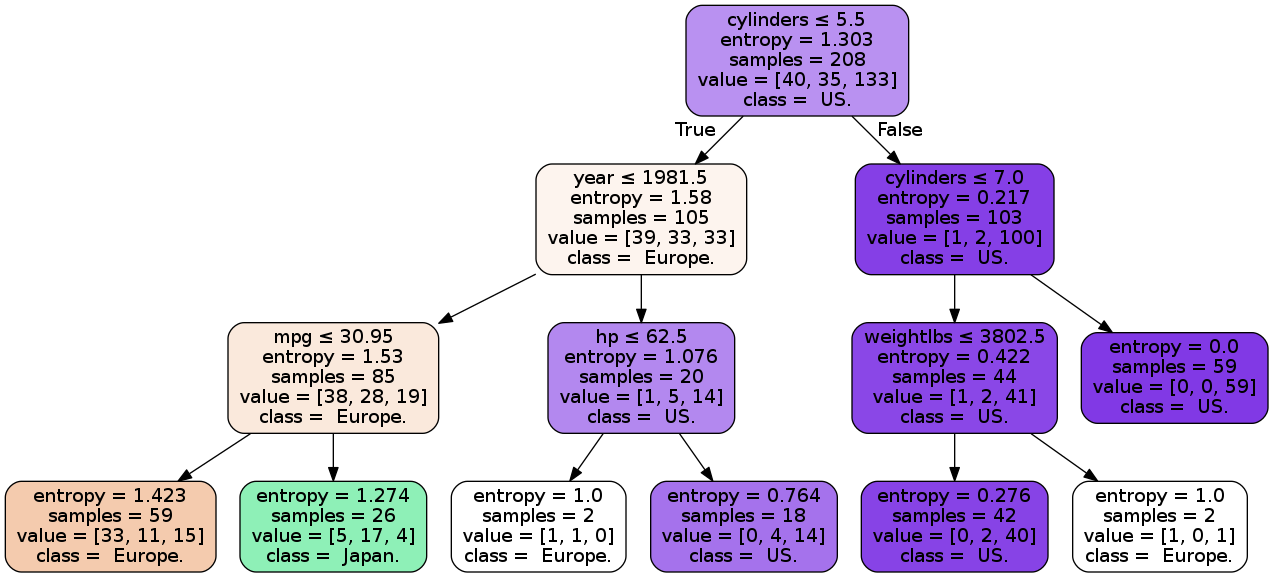

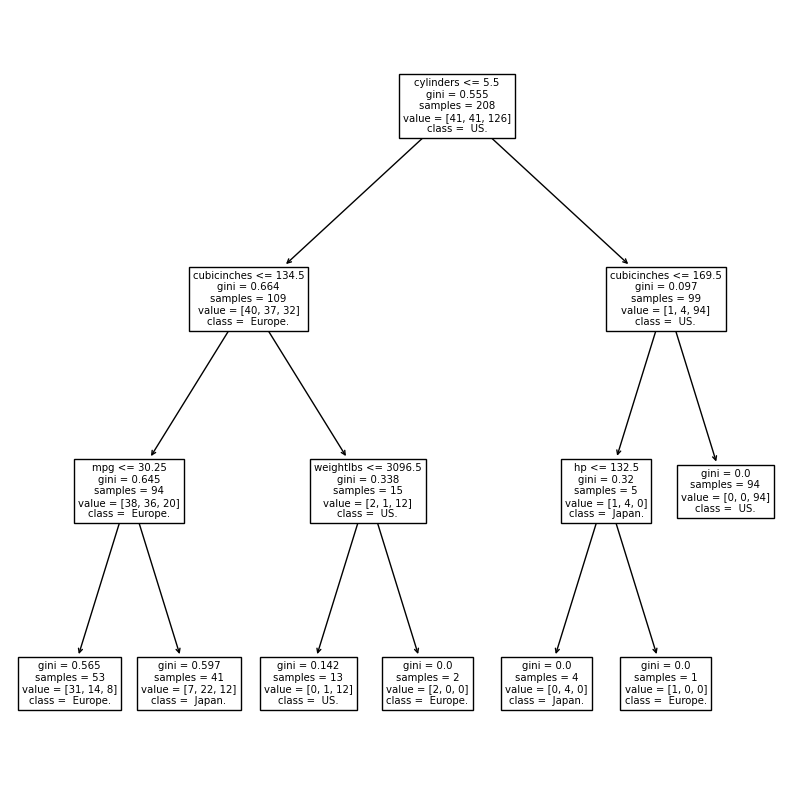

In [27]:
#plot tree can also be used for visualising the tree
plt.figure(figsize=(10,10))
plot_tree(dt_car,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

In [30]:
#Calculating accuracy
pred = dt_car.predict(X_test)
print('Test Accuracy is:',accuracy_score(y_test,pred))

Test Accuracy is: 0.8490566037735849


In [31]:
pred = dt_car.predict(X_train)
print('Train Accuracy is:',accuracy_score(y_train,pred))

Train Accuracy is: 0.7980769230769231


In [20]:
dt_car.feature_importances_

array([0.09430818, 0.        , 0.83062733, 0.        , 0.        ,
       0.07506449, 0.        ])

## Feature Importance

In [23]:
'''
- Selecting only the important features
'''
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(dt_car.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
print(features)

      Features  Importance
2  cubicinches       0.831
0          mpg       0.094
5   time-to-60       0.075
1    cylinders       0.000
3           hp       0.000
4    weightlbs       0.000
6         year       0.000


In [22]:
print(car_data.corr())

                  mpg  cylinders  cubicinches        hp  weightlbs  \
mpg          1.000000  -0.776710    -0.802686 -0.774905  -0.821269   
cylinders   -0.776710   1.000000     0.951350  0.845155   0.891426   
cubicinches -0.802686   0.951350     1.000000  0.905721   0.924603   
hp          -0.774905   0.845155     0.905721  1.000000   0.857974   
weightlbs   -0.821269   0.891426     0.924603  0.857974   1.000000   
time-to-60   0.509070  -0.578161    -0.609733 -0.744873  -0.476138   
year         0.550441  -0.322239    -0.348755 -0.383869  -0.260467   
brand       -0.488253   0.598536     0.621733  0.473514   0.543646   

             time-to-60      year     brand  
mpg            0.509070  0.550441 -0.488253  
cylinders     -0.578161 -0.322239  0.598536  
cubicinches   -0.609733 -0.348755  0.621733  
hp            -0.744873 -0.383869  0.473514  
weightlbs     -0.476138 -0.260467  0.543646  
time-to-60     1.000000  0.312311 -0.335770  
year           0.312311  1.000000 -0.032961  
b

In [24]:
features

,Features,Importance
2,cubicinches,0.831
0,mpg,0.094
5,time-to-60,0.075
1,cylinders,0.000
3,hp,0.000
4,weightlbs,0.000
6,year,0.000


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        The above data shows which feature is important based on criterion provided
    </span>
</div>

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        We can select the required important features and retrain the model
    </span>
</div>

---

# Random Forest   Ensamble Learning

The following parameters should be considered before using random forest classifier:
- __n_estimators__: Integer value to define number of trees in the forest.
- __criterion__: To measure quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

For information about rest of the parameters: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier'>Random Forest</a>

In [ ]:
#Training
rf_car=RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=3)
rf_car.fit(X_train,y_train)

In [ ]:
#Calculating accuracy
pred = rf_car.predict(X_test)
print('Test Accuracy is:',accuracy_score(y_test,pred))

In [ ]:
#Calculating accuracy
pred = rf_car.predict(X_train)
print('Train Accuracy is:',accuracy_score(y_train,pred))

In [ ]:
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(rf_car.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
print(features)

## Visualising 

In [ ]:
#Visualing a single estimator
plt.figure(figsize=(20,10))
plot_tree(rf_car.estimators_[5],feature_names=X_train.columns,class_names=list(lb.classes_),fontsize=12)
plt.show()

<b><i>Conclusion</i></b>: In this demonstration, we have learned to apply and visualize decision tree algorithm and random forest classifier.